<a href="https://colab.research.google.com/github/divyavchandran/Deeplearning-for-CV/blob/main/road_flood_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os


In [5]:
os.chdir('/content/drive/MyDrive/TRIAL_python')

In [6]:
pwd

'/content/drive/MyDrive/TRIAL_python'

In [7]:
import glob
import os
import numpy as np
import pandas as pd
import re
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [8]:
img = cv2.imread('../input/roadway-flooding-image-dataset/Dataset/images/image_1.jpg')
mask = cv2.imread('../input/roadway-flooding-image-dataset/Dataset/labels/label_1.png')

TypeError: ignored

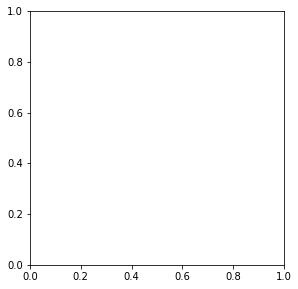

In [14]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask*255)

In [15]:
images_path = '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images'
masks_path = '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels'

In [16]:
all_images = os.listdir(images_path)
all_masks = os.listdir(masks_path)

In [17]:
all_images[:5]

['image_102.jpg',
 'image_103.jpg',
 'image_106.jpg',
 'image_109.jpg',
 'image_110.jpg']

In [18]:
all_masks[:5]

['label_256.png',
 'label_401.png',
 'label_159.png',
 'label_383.png',
 'label_288.png']

In [19]:
images_dict = {}
masks_dict = {}
for img, mask in zip(all_images, all_masks) :
    img_key = re.findall('\d+', img)[0]
    mask_key = re.findall('\d+', mask)[0]
    images_dict[int(img_key)] = os.path.join(images_path, img)
    masks_dict[int(mask_key)] = os.path.join(masks_path, mask)

In [20]:
images_dict = dict(sorted(images_dict.items(), key = lambda x : x[0]))
masks_dict = dict(sorted(masks_dict.items(), key = lambda x : x[0]))

In [21]:
images_paths = list(images_dict.values())
masks_paths = list(masks_dict.values())

In [22]:
print(f'Number Of Images is {len(all_images)}')
print(f'Number Of Labels is {len(all_masks)}')

Number Of Images is 441
Number Of Labels is 441


In [23]:
images_paths[:5]

['/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_1.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_2.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_3.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_4.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_5.jpg']

In [24]:
masks_paths[:5]

['/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_1.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_2.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_3.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_4.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_5.png']

In [25]:
images_paths[-5:]

['/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_437.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_438.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_439.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_440.jpg',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/images/image_441.jpg']

In [26]:
masks_paths[-5:]

['/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_437.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_438.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_439.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_440.png',
 '/content/drive/MyDrive/TRIAL_python/road_flood/Dataset/labels/label_441.png']

In [27]:
IMG_HEIGHT, IMG_WIDTH = 224, 224

images = []
masks = []

for img_path, mask_path in zip(images_paths, masks_paths) :
    image = tf.keras.preprocessing.image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = input_arr / 255.0
#     image = tf.keras.preprocessing.image.array_to_img(input_arr, ).resize((256, 256))
    images.append(np.array(input_arr))
    
    mask = tf.keras.preprocessing.image.load_img(mask_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    input_mask = tf.keras.preprocessing.image.img_to_array(mask)
#     input_mask = tf.reduce_sum(input_mask, axis = -1, keepdims=True)
    #mask = tf.keras.preprocessing.image.array_to_img(input_mask, ).resize((256, 256))
    masks.append(np.array(input_mask))

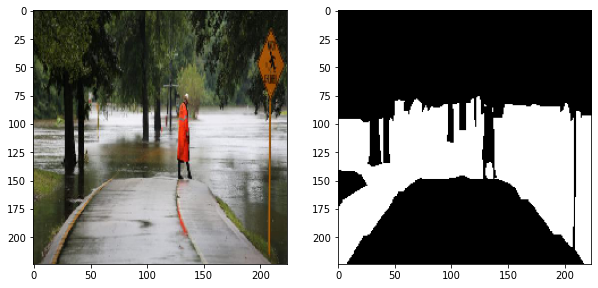

In [28]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(images[0])
plt.subplot(1,2,2)
plt.imshow(masks[0]*255, cmap = 'gray')

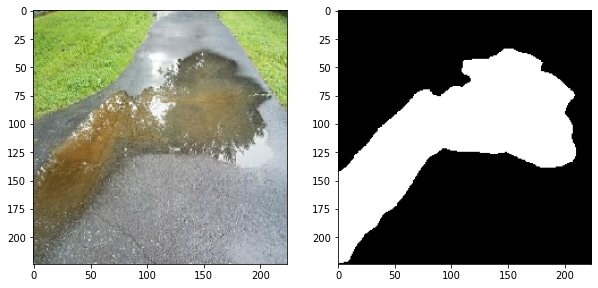

In [29]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(images[-3])
plt.subplot(1,2,2)
plt.imshow(masks[-3]*255, cmap = 'gray')

In [30]:
images = np.array(images)
masks = np.array(masks)

In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(images, masks, test_size=0.15, random_state=42)

In [32]:
def conv2d_block(input_tensor, n_filters, kernel_size = 3):
    x = input_tensor
    for i in range(2):
        x = tf.keras.layers.Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
                                   kernel_initializer = 'he_normal', padding = 'same')(x)
        x = tf.keras.layers.Activation('relu')(x)
    return x


def encoder_block(inputs, n_filters=64, pool_size=(2,2), dropout=0.3):
    f = conv2d_block(inputs, n_filters=n_filters)
    p = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(f)
    p = tf.keras.layers.Dropout(0.3)(p) 
    return f, p


def encoder(inputs):
    f1, p1 = encoder_block(inputs, n_filters=64, pool_size=(2,2), dropout=0.3)
    f2, p2 = encoder_block(p1, n_filters=128, pool_size=(2,2), dropout=0.3)
    f3, p3 = encoder_block(p2, n_filters=256, pool_size=(2,2), dropout=0.3)
    f4, p4 = encoder_block(p3, n_filters=512, pool_size=(2,2), dropout=0.3)
    return p4, (f1, f2, f3, f4)

In [33]:
def bottleneck(inputs):
    bottle_neck = conv2d_block(inputs, n_filters=1024)
    return bottle_neck

In [34]:
def decoder_block(inputs, conv_output, n_filters=64, kernel_size=3, strides=3, dropout=0.3):
    u = tf.keras.layers.Conv2DTranspose(n_filters, kernel_size, strides = strides, padding = 'same')(inputs)
    c = tf.keras.layers.concatenate([u, conv_output])
    c = tf.keras.layers.Dropout(dropout)(c)
    c = conv2d_block(c, n_filters, kernel_size=3)
    return c


def decoder(inputs, convs, output_channels):
    f1, f2, f3, f4 = convs
    c6 = decoder_block(inputs, f4, n_filters=512, kernel_size=(3,3), strides=(2,2), dropout=0.3)
    c7 = decoder_block(c6, f3, n_filters=256, kernel_size=(3,3), strides=(2,2), dropout=0.3)
    c8 = decoder_block(c7, f2, n_filters=128, kernel_size=(3,3), strides=(2,2), dropout=0.3)
    c9 = decoder_block(c8, f1, n_filters=64, kernel_size=(3,3), strides=(2,2), dropout=0.3)
    outputs = tf.keras.layers.Conv2D(output_channels, (1, 1), activation='softmax')(c9)
    return outputs

In [35]:
OUTPUT_CHANNELS = 3

def unet():
 
  # specify the input shape
    inputs = tf.keras.layers.Input(shape=(224, 224,3))

  # feed the inputs to the encoder
    encoder_output, convs = encoder(inputs)

  # feed the encoder output to the bottleneck
    bottle_neck = bottleneck(encoder_output)

  # feed the bottleneck and encoder block outputs to the decoder
  # specify the number of classes via the `output_channels` argument
    outputs = decoder(bottle_neck, convs, output_channels=OUTPUT_CHANNELS)
  
  # create the model
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    return model


In [36]:
# instantiate the model
model = unet()

# see the resulting model architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 activation (Activation)        (None, 224, 224, 64  0           ['conv2d[0][0]']                 
                                )                                                             

In [37]:
# configure the optimizer, loss and metrics for training
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), batch_size=32, epochs=25)

Epoch 1/25
12/12 [==============================] - 63s 3s/step - loss: 0.7344 - accuracy: 0.1390 - val_loss: 0.6976 - val_accuracy: 0.5836
Epoch 2/25
12/12 [==============================] - 19s 2s/step - loss: 0.7072 - accuracy: 0.3000 - val_loss: 0.6944 - val_accuracy: 0.7383
Epoch 3/25
12/12 [==============================] - 19s 2s/step - loss: 0.7025 - accuracy: 0.3323 - val_loss: 0.6920 - val_accuracy: 0.7459
Epoch 4/25
12/12 [==============================] - 19s 2s/step - loss: 0.6985 - accuracy: 0.3372 - val_loss: 0.6895 - val_accuracy: 0.7005
Epoch 5/25
12/12 [==============================] - 19s 2s/step - loss: 0.6955 - accuracy: 0.3368 - val_loss: 0.6881 - val_accuracy: 0.6908
Epoch 6/25
12/12 [==============================] - 19s 2s/step - loss: 0.6928 - accuracy: 0.3372 - val_loss: 0.6866 - val_accuracy: 0.6790
Epoch 7/25
12/12 [==============================] - 19s 2s/step - loss: 0.6908 - accuracy: 0.3351 - val_loss: 0.6850 - val_accuracy: 0.6787
Epoch 8/25
12/12 [==

In [39]:
prediction = model.predict(images[5:6])

1/1 [==============================] - 2s 2s/step


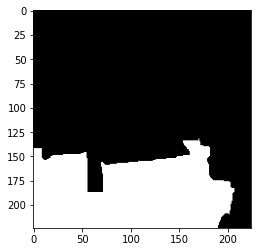

In [40]:
plt.imshow(masks[5]*255)

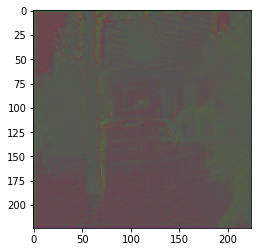

In [41]:
plt.imshow(prediction[0])

In [ ]:
prediction[0]

NameError: ignored